In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt


tokenizer = Tokenizer()

data = open('/tmp/irish-lyrics-eof.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_words)


--2020-11-10 23:50:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.13.240, 172.217.15.80, 172.217.12.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.13.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-11-10 23:50:59 (124 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, '

### Process Data into Tokens in Lists

In [ ]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

### LSTM Model

In [ ]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
#custom optimizer
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=20, verbose=1)
#print model.summary()
print(model)


Epoch 1/20
377/377 [==============================] - 4s 11ms/step - loss: 6.6272 - accuracy: 0.0734
Epoch 2/20
377/377 [==============================] - 4s 11ms/step - loss: 5.7468 - accuracy: 0.1123
Epoch 3/20
377/377 [==============================] - 4s 11ms/step - loss: 4.8428 - accuracy: 0.1672
Epoch 4/20
377/377 [==============================] - 4s 11ms/step - loss: 3.8205 - accuracy: 0.2495
Epoch 5/20
377/377 [==============================] - 4s 11ms/step - loss: 2.8827 - accuracy: 0.3740
Epoch 6/20
377/377 [==============================] - 4s 11ms/step - loss: 2.2018 - accuracy: 0.4963
Epoch 7/20
377/377 [==============================] - 4s 11ms/step - loss: 1.7098 - accuracy: 0.5963
Epoch 8/20
377/377 [==============================] - 4s 11ms/step - loss: 1.3875 - accuracy: 0.6708
Epoch 9/20
377/377 [==============================] - 4s 11ms/step - loss: 1.1811 - accuracy: 0.7177
Epoch 10/20
377/377 [==============================] - 4s 11ms/step - loss: 1.0769 - accura

### Plot Accuracy

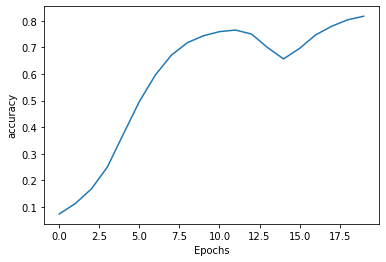

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()


plot_graphs(history, 'accuracy')

### Generate Text

In [ ]:
seed_text = "I've got a bad feeling about this"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this noon so little high i high there i must bide say love love me blame the high gone tree to locality agin the sinking funds spleen sinking funds when sinking skibbereen must hat say over love love gone so love gone easy as they love love month as they love easy as as as they stepped lovely look on so in eyes more twinkle side as the news thats goin over here as sinking sinking sinking sinking sinking sinking receiver hill as hat as over here as sinking as sinking sinking sinking receiver lamp drawn side say say the love
